In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = True

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dir = r'E:\brain-tumor-mri-dataset\Brain-NoBrain\train'
val_dir = r'E:\brain-tumor-mri-dataset\Brain-NoBrain\val'

train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = data_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

checkpoint_callback = ModelCheckpoint(
    'brain_classifier_best.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[checkpoint_callback, early_stop_callback]
)

model.save('brain_classifier_final_v2.h5')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 173s 2us/step
Found 2224 images belonging to 2 classes.
Found 557 images belonging to 2 classes.


d:\envs\BrainTumorAppEnvironment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8476 - loss: 2.1968
Epoch 1: val_loss improved from inf to 1887100.62500, saving model to brain_classifier_best.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 758s 10s/step - accuracy: 0.8486 - loss: 2.1770 - val_accuracy: 0.6230 - val_loss: 1887100.6250
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9680 - loss: 0.0913
Epoch 2: val_loss improved from 1887100.62500 to 5321.04736, saving model to brain_classifier_best.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 691s 10s/step - accuracy: 0.9680 - loss: 0.0915 - val_accuracy: 0.6230 - val_loss: 5321.0474
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9644 - loss: 0.0821
Epoch 3: val_loss improved from 5321.04736 to 4160.62451, saving model to brain_classifier_best.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 686s 10s/step - accuracy: 0.9645 - loss: 0.0822 - val_accuracy: 0.6230 - val_loss: 4160.6245
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9562 - loss: 0.2766


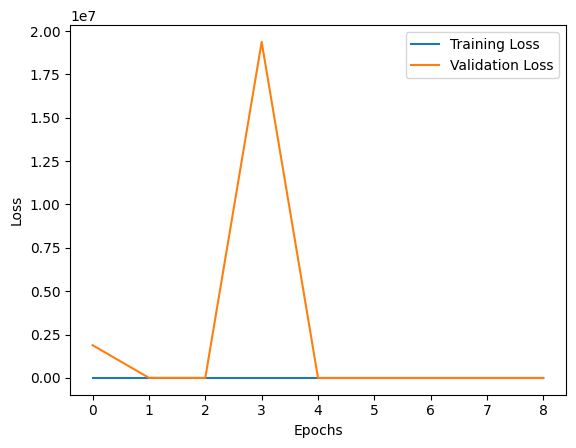

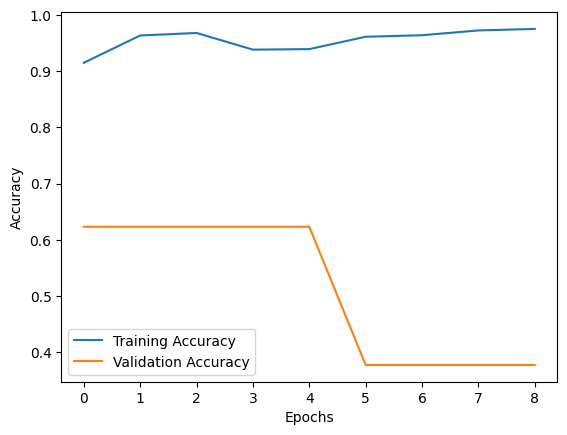

In [3]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [4]:
from tensorflow.keras.models import load_model
import numpy as np

In [ ]:
# Load the trained model
model_path = r'E:\brain_classifier_final_v2.h5'
model = load_model(model_path)

test_dir = r'PATH'  

test_data_gen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_data = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)


test_loss, test_accuracy = model.evaluate(test_data, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


predictions = model.predict(test_data)
predicted_classes = (predictions > 0.5).astype(int)  

class_labels = list(test_data.class_indices.keys())

def display_predictions(test_data, predicted_classes):
    images, true_labels = next(test_data)  # Corrected line
    true_classes = true_labels.astype(int)
    
    plt.figure(figsize=(12, 8))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[true_classes[i]]
        predicted_label = class_labels[predicted_classes[i][0]]
        color = 'green' if true_label == predicted_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


display_predictions(test_data, predicted_classes)